#### Supplement Sales Prediction

Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

#### Your task is to predict the store sales for each store in the test set for the next two months.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import StandardScaler
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer


#Model Creation :
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import r2_score,mean_squared_log_error

#### Data Inspection:

In [2]:
path=r"C:\Users\HP\Desktop\TRAIN.csv"
train=pd.read_csv(path)
train

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0       T1000001         1         S1            L3          R1  2018-01-01   
1       T1000002       253         S4            L2          R1  2018-01-01   
2       T1000003       252         S3            L2          R1  2018-01-01   
3       T1000004       251         S2            L3          R1  2018-01-01   
4       T1000005       250         S2            L3          R4  2018-01-01   
...          ...       ...        ...           ...         ...         ...   
188335  T1188336       149         S2            L3          R2  2019-05-31   
188336  T1188337       153         S4            L2          R1  2019-05-31   
188337  T1188338       154         S1            L3          R2  2019-05-31   
188338  T1188339       155         S3            L1          R2  2019-05-31   
188339  T1188340       152         S2            L1          R1  2019-05-31   

        Holiday Discount  #Order     Sales  
0             1      Yes       9   7011.84  
1             1      Yes      60  51789.12  
2             1      Yes      42  36868.20  
3             1      Yes      23  19715.16  
4             1      Yes      62  45614.52  
...         ...      ...     ...       ...  
188335        1      Yes      51  37272.00  
188336        1       No      90  54572.64  
188337        1       No      56  31624.56  
188338        1      Yes      70  49162.41  
188339        1       No      47  37977.00  

[188340 rows x 10 columns]

- In this train dataset depending upon 9 independent features we need to predict the sales .
- The train dataset is having 10 columns out of which 9 columns are the feature data and 1 column is the label variable.
- Now we can see this dataset is having 6 nominal data and 1 categorical data and only the label data is a continuous one, that means it is a regression type of problem. 


In [3]:
path=r"C:\Users\HP\Desktop\TEST_FINAL.csv"
test=pd.read_csv(path)
test

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0      T1188341       171         S4            L2          R3  2019-06-01   
1      T1188342       172         S1            L1          R1  2019-06-01   
2      T1188343       173         S4            L2          R1  2019-06-01   
3      T1188344       174         S1            L1          R4  2019-06-01   
4      T1188345       170         S1            L1          R2  2019-06-01   
...         ...       ...        ...           ...         ...         ...   
22260  T1210601       186         S2            L5          R2  2019-07-31   
22261  T1210602        11         S4            L2          R1  2019-07-31   
22262  T1210603       185         S1            L1          R3  2019-07-31   
22263  T1210604        69         S1            L1          R4  2019-07-31   
22264  T1210605       365         S2            L1          R2  2019-07-31   

       Holiday Discount  
0            0       No  
1            0       No  
2            0       No  
3            0       No  
4            0       No  
...        ...      ...  
22260        0       No  
22261        0       No  
22262        0      Yes  
22263        0       No  
22264        0       No  

[22265 rows x 8 columns]

- This test dataset is having 8 independent features.
- Like we have seen that test dataset is also having the same features except the dependent variable and order column. 
- As the label column is missing, we will use this dataset after model training for testing purpose.

In [66]:
#checking the shape of the dataset
print ((train.shape),(test.shape))

(188340, 10) (22265, 8)


- train dataset has 10 columns and test dataset has 8 columns and number of rows are less in the test dataset.

In [5]:
#checking the column of the datasets
print ((train.columns),(test.columns))

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object') Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')


- Both the dataset has categorical, numerical and nominal data.
- Test dataset is devoid of sales column. And we will use the dataset to predict the sales.

In [89]:
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

- The dataset is containing good blend of categorical, nominal and numerical columns. 

In [7]:
test.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object

- The dataset is containing good blend of categorical, nominal and numerical columns. 

In [8]:
train.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

- As we can see, in train each of the column is containing different numbers of category. It seems ID column is containing only unique IDs that we need to get rid of. 

In [9]:
test.nunique()

ID               22265
Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Date                61
Holiday              2
Discount             2
dtype: int64

- As we can see, in test each of the column is containing different numbers of category. It seems ID column is containing only unique IDs that we need to get rid of. 

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


- No null value present in the train dataset. There are 3 types of data integer, float and object.

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


- No null value present in the test dataset. There are 2 types of data integer, object.

In [12]:
train.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

- No missing value present in the  train dataset.

In [13]:
train.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

- No missing value present in the test dataset

In [15]:
train.describe()

Store_id        Holiday         #Order          Sales
count  188340.000000  188340.000000  188340.000000  188340.000000
mean      183.000000       0.131783      68.205692   42784.327982
std       105.366308       0.338256      30.467415   18456.708302
min         1.000000       0.000000       0.000000       0.000000
25%        92.000000       0.000000      48.000000   30426.000000
50%       183.000000       0.000000      63.000000   39678.000000
75%       274.000000       0.000000      82.000000   51909.000000
max       365.000000       1.000000     371.000000  247215.000000

- Holiday contains discrete values.
- #Order column is containing minimum number of order and maximum number of order. 
- Sales column is minimum sales and maximum sales. 

In [16]:
test.describe()

Store_id       Holiday
count  22265.000000  22265.000000
mean     183.000000      0.032787
std      105.368395      0.178082
min        1.000000      0.000000
25%       92.000000      0.000000
50%      183.000000      0.000000
75%      274.000000      0.000000
max      365.000000      1.000000

#### Exploratory Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

Let's do that:
#### Univariate Analysis:

It is done to understand the distribution of the continuous data and also to get the count of the categorial data. But in this dataset there is no column which is containing float or continuous data. Hence we are only checking the count in univariate analysis.


Minimum Sales:  0.0
Maximum Sales:  247215.0


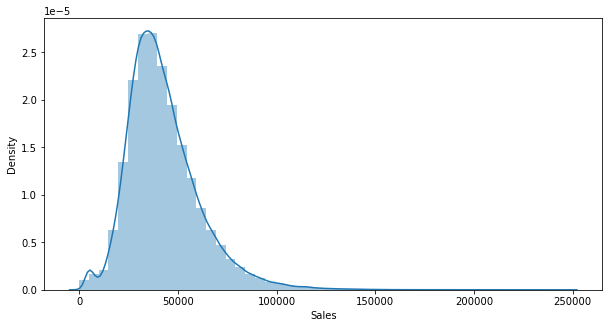

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(train['Sales'])
print('Minimum Sales: ',train['Sales'].min())
print('Maximum Sales: ',train['Sales'].max())

- The label Sales is showing skewness as minimum sale is 0.0 and maximum sale is 247215.0

Minimum Sales:  0
Maximum Sales:  371


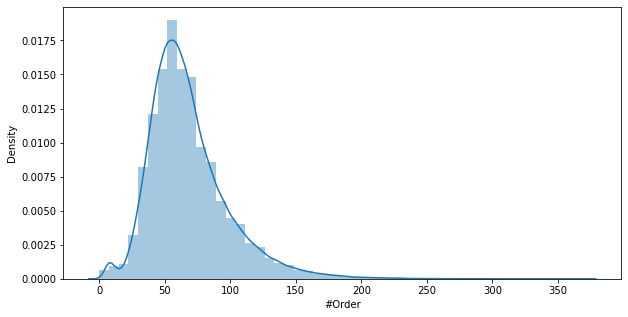

In [89]:
plt.figure(figsize=(10,5))
sns.distplot(train['#Order'])
print('Minimum Sales: ',train['#Order'].min())
print('Maximum Sales: ',train['#Order'].max())

- Just like the sales column order column is showing skewness, as Minimum order is 0 and maximum order is 371

In [90]:
train['Store_id'].value_counts()

255    516
38     516
294    516
39     516
167    516
      ... 
337    516
82     516
210    516
338    516
128    516
Name: Store_id, Length: 365, dtype: int64

In [91]:
test['Store_id'].value_counts()

351    61
356    61
21     61
37     61
53     61
       ..
250    61
266    61
282    61
298    61
16     61
Name: Store_id, Length: 365, dtype: int64

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

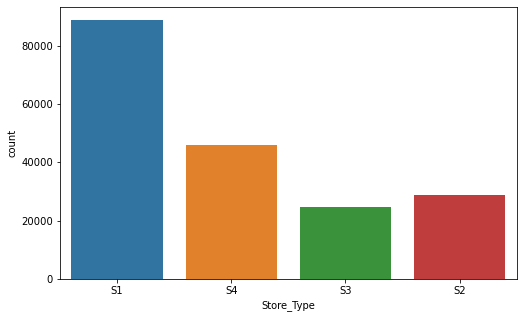

In [92]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(train['Store_Type'])
train['Store_Type'].value_counts()

- The S1 type stores are highest in counts, in train dataset.

S1    10492
S4     5429
S2     3416
S3     2928
Name: Store_Type, dtype: int64

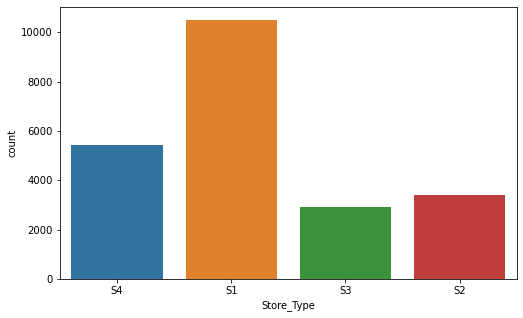

In [93]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(test['Store_Type'])
test['Store_Type'].value_counts()

- The S1 type stores are highest in counts, in test dataset.

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

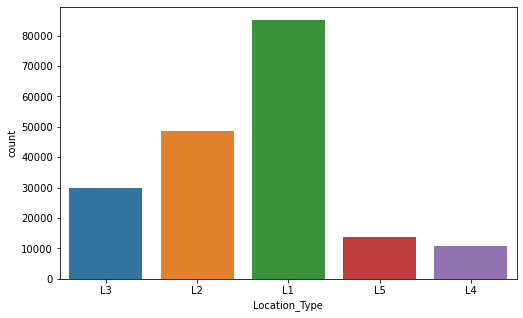

In [94]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(train['Location_Type'])
train['Location_Type'].value_counts()

- L1 location type is highest in count in train dataset.

L1    10065
L2     5734
L3     3538
L5     1647
L4     1281
Name: Location_Type, dtype: int64

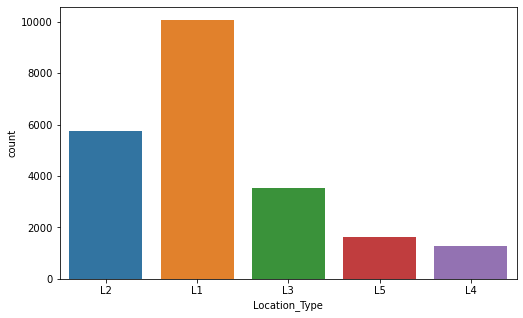

In [95]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(test['Location_Type'])
test['Location_Type'].value_counts()

- L1 location type is highest in count in test dataset.

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

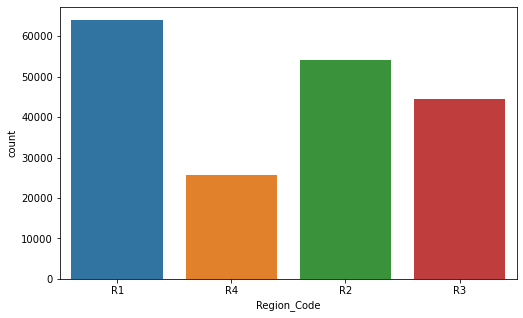

In [96]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(train['Region_Code'])
train['Region_Code'].value_counts()

- R1 Region_Code is highest in count in train dataset.

R1    7564
R2    6405
R3    5246
R4    3050
Name: Region_Code, dtype: int64

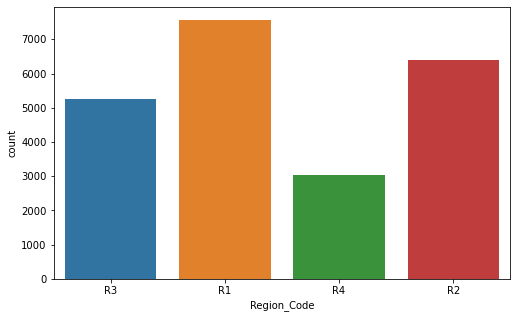

In [97]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(test['Region_Code'])
test['Region_Code'].value_counts()

- R1 Region_Code is highest in count in test dataset.

0    163520
1     24820
Name: Holiday, dtype: int64

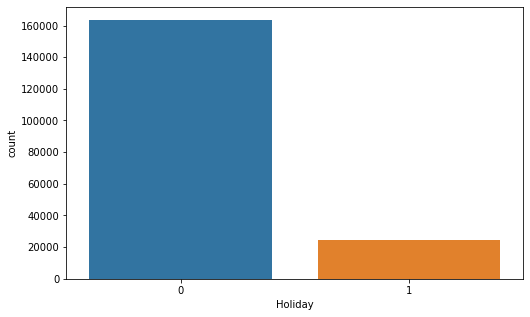

In [98]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(train['Holiday'])
train['Holiday'].value_counts()

- If the day is a holiday or not, Not a holiday is containing more number of data thand a holiday in train dataset

0    21535
1      730
Name: Holiday, dtype: int64

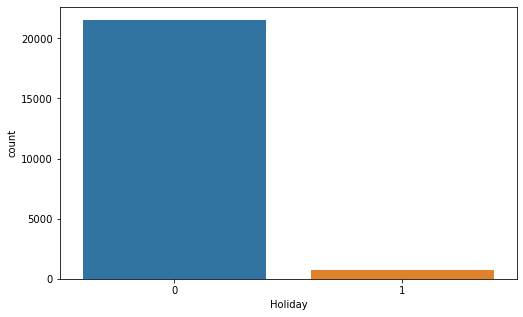

In [99]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(test['Holiday'])
test['Holiday'].value_counts()

- If the day is a holiday or not, Not a holiday is containing more number of data thand a holiday in test dataset

No     104051
Yes     84289
Name: Discount, dtype: int64

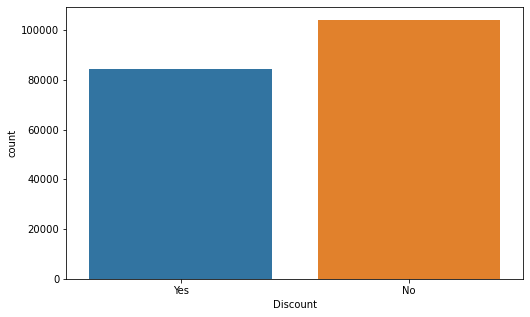

In [100]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(train['Discount'])
train['Discount'].value_counts()

- If discount is offered by store on the given Date, no discount given category if higher than discount given category, in the train dataset.

No     12773
Yes     9492
Name: Discount, dtype: int64

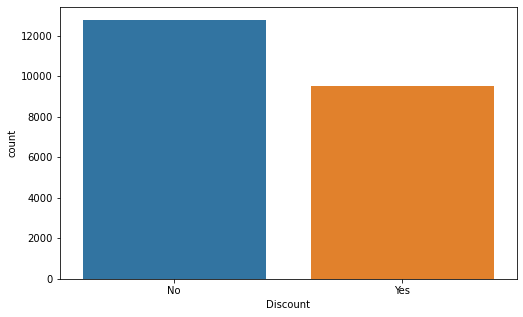

In [101]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(test['Discount'])
test['Discount'].value_counts()

- If discount is offered by store on the given Date, no discount given category if higher than discount given category, in the test dataset.

#### Bivariate Analysis:
Let's check the relationships of the features and label data.

In [103]:
# making a list containtaing all the categorical columns
df_cat_features=train[['Store_Type','Location_Type','Region_Code','Holiday','Discount']]

In [104]:
y=train['Sales']
x=train.drop(columns=['Sales'])

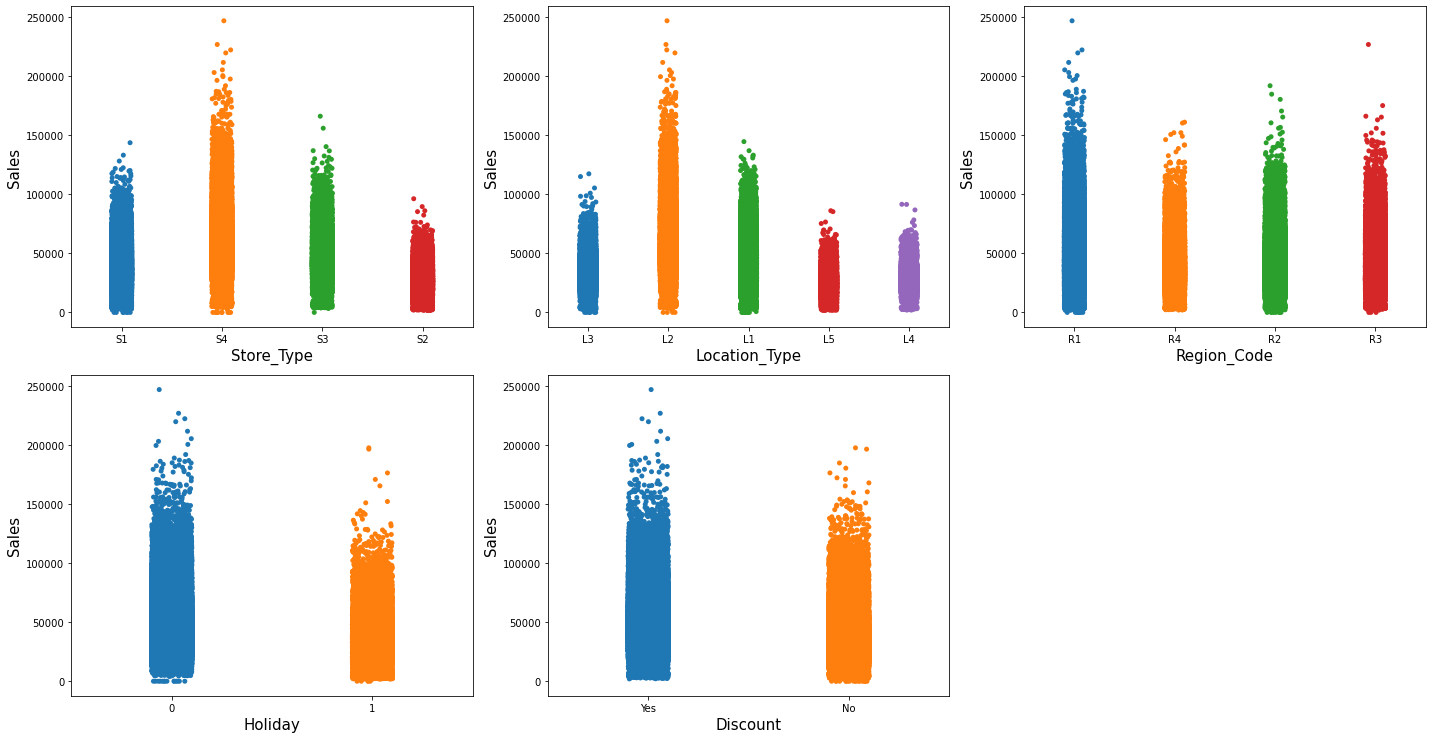

In [105]:
# By using that list containg categorical data we will check the relations between sales and the features
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_cat_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(df_cat_features[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Sales',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

<AxesSubplot:xlabel='#Order', ylabel='Sales'>

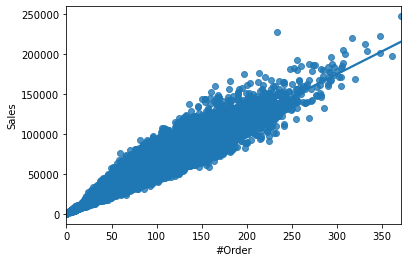

In [106]:
sns.regplot(train['#Order'],y)

In [67]:
#### Data cleaning:

train.skew()

Store_id    0.000000
Holiday     2.177176
#Order      1.372874
Sales       1.248819
dtype: float64

In [4]:
from scipy.stats import zscore

In [9]:
z_score = zscore(train[["Sales"]])     
abs_z_score=np.abs(z_score)#converting data into standard normal distribution

filtering_entry=(abs_z_score<2).all(axis=1)

train=train[filtering_entry]
train.describe()

Store_id        Holiday         #Order          Sales
count  175367.000000  175367.000000  175367.000000  175367.000000
mean      182.365399       0.124966      64.413761   40367.463696
std       105.593352       0.330682      22.984535   13643.597068
min         1.000000       0.000000      10.000000    8781.000000
25%        90.000000       0.000000      48.000000   30228.000000
50%       184.000000       0.000000      61.000000   38826.000000
75%       273.000000       0.000000      78.000000   49473.540000
max       365.000000       1.000000     170.000000   74919.000000

#### Data Engineering (Train data ):

For making the data more simple and understandable we need to create new columns from existing columns.


In [10]:
train.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   
5  T1000006       249         S1            L3          R2  2018-01-01   

   Holiday Discount  #Order     Sales  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52  
5        1      Yes      39  34211.22

In [11]:
train['year'] = pd.DatetimeIndex(train['Date']).year 
train['month'] = pd.DatetimeIndex(train['Date']).month 
train['day'] = pd.DatetimeIndex(train['Date']).day 

In [12]:
train.drop(['Date'],axis=1,inplace=True)

In [13]:
train.head()

ID  Store_id Store_Type Location_Type Region_Code  Holiday Discount  \
1  T1000002       253         S4            L2          R1        1      Yes   
2  T1000003       252         S3            L2          R1        1      Yes   
3  T1000004       251         S2            L3          R1        1      Yes   
4  T1000005       250         S2            L3          R4        1      Yes   
5  T1000006       249         S1            L3          R2        1      Yes   

   #Order     Sales  year  month  day  
1      60  51789.12  2018      1    1  
2      42  36868.20  2018      1    1  
3      23  19715.16  2018      1    1  
4      62  45614.52  2018      1    1  
5      39  34211.22  2018      1    1

In [14]:
train.nunique()

ID               175367
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Holiday               2
Discount              2
#Order              157
Sales             37983
year                  2
month                12
day                  31
dtype: int64

<AxesSubplot:xlabel='month', ylabel='Sales'>

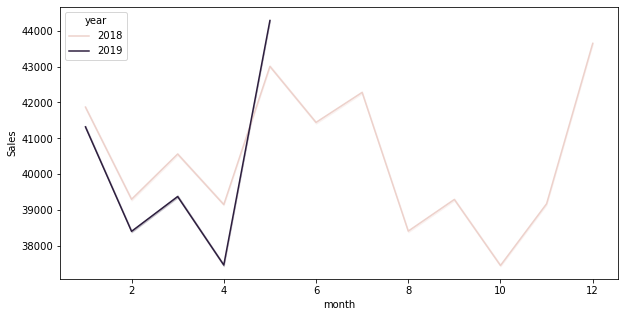

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x='month',y='Sales',hue='year',ci=18,data=train)

#### Encoding of train dataset:

In [16]:
en=OrdinalEncoder()
for i in train.columns:
    if train[i].dtypes=='object':
        train[i]=en.fit_transform(train[i].values.reshape(-1,1))
train.head()

ID  Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  \
1  0.0       253         3.0            1.0          0.0        1       1.0   
2  1.0       252         2.0            1.0          0.0        1       1.0   
3  2.0       251         1.0            2.0          0.0        1       1.0   
4  3.0       250         1.0            2.0          3.0        1       1.0   
5  4.0       249         0.0            2.0          1.0        1       1.0   

   #Order     Sales  year  month  day  
1      60  51789.12  2018      1    1  
2      42  36868.20  2018      1    1  
3      23  19715.16  2018      1    1  
4      62  45614.52  2018      1    1  
5      39  34211.22  2018      1    1

In [17]:
# Drop Alert: dropping Route and Additional_info columns
train.drop(["ID","#Order","year","day"],axis = 1,inplace = True)
train.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  \
1       253         3.0            1.0          0.0        1       1.0   
2       252         2.0            1.0          0.0        1       1.0   
3       251         1.0            2.0          0.0        1       1.0   
4       250         1.0            2.0          3.0        1       1.0   
5       249         0.0            2.0          1.0        1       1.0   

      Sales  month  
1  51789.12      1  
2  36868.20      1  
3  19715.16      1  
4  45614.52      1  
5  34211.22      1

In [18]:
train.shape

(175367, 8)

#### Data Engineering (Test data ):

For making the data more simple and understandable we need to create new columns from existing columns.


In [19]:
test.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1188341       171         S4            L2          R3  2019-06-01   
1  T1188342       172         S1            L1          R1  2019-06-01   
2  T1188343       173         S4            L2          R1  2019-06-01   
3  T1188344       174         S1            L1          R4  2019-06-01   
4  T1188345       170         S1            L1          R2  2019-06-01   

   Holiday Discount  
0        0       No  
1        0       No  
2        0       No  
3        0       No  
4        0       No

In [20]:
test['year'] = pd.DatetimeIndex(test['Date']).year 
test['month'] = pd.DatetimeIndex(test['Date']).month 
test['day'] = pd.DatetimeIndex(test['Date']).day 

In [21]:
test.drop(['Date'],axis=1,inplace=True)

In [22]:
test.head()

ID  Store_id Store_Type Location_Type Region_Code  Holiday Discount  \
0  T1188341       171         S4            L2          R3        0       No   
1  T1188342       172         S1            L1          R1        0       No   
2  T1188343       173         S4            L2          R1        0       No   
3  T1188344       174         S1            L1          R4        0       No   
4  T1188345       170         S1            L1          R2        0       No   

   year  month  day  
0  2019      6    1  
1  2019      6    1  
2  2019      6    1  
3  2019      6    1  
4  2019      6    1

In [23]:
test.nunique()

ID               22265
Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Holiday              2
Discount             2
year                 1
month                2
day                 31
dtype: int64

#### Encoding of test dataset:

In [24]:
en=OrdinalEncoder()
for i in test.columns:
    if test[i].dtypes=='object':
        test[i]=en.fit_transform(test[i].values.reshape(-1,1))
test.head()

ID  Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  \
0  0.0       171         3.0            1.0          2.0        0       0.0   
1  1.0       172         0.0            0.0          0.0        0       0.0   
2  2.0       173         3.0            1.0          0.0        0       0.0   
3  3.0       174         0.0            0.0          3.0        0       0.0   
4  4.0       170         0.0            0.0          1.0        0       0.0   

   year  month  day  
0  2019      6    1  
1  2019      6    1  
2  2019      6    1  
3  2019      6    1  
4  2019      6    1

In [25]:
# dropping those not useful columns
test.drop(["ID","year","day"],axis = 1,inplace = True)
test.head()

Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  month
0       171         3.0            1.0          2.0        0       0.0      6
1       172         0.0            0.0          0.0        0       0.0      6
2       173         3.0            1.0          0.0        0       0.0      6
3       174         0.0            0.0          3.0        0       0.0      6
4       170         0.0            0.0          1.0        0       0.0      6

In [26]:
test.shape

(22265, 7)

##### Plotting heatmap (correlation matrix):
Let's try to see if we can reduce the features using different techniques. Let's plot Heatmap to visualize and find the coefficient and multicolinearity.

In [27]:
corr=train.corr()
corr.shape

(8, 8)

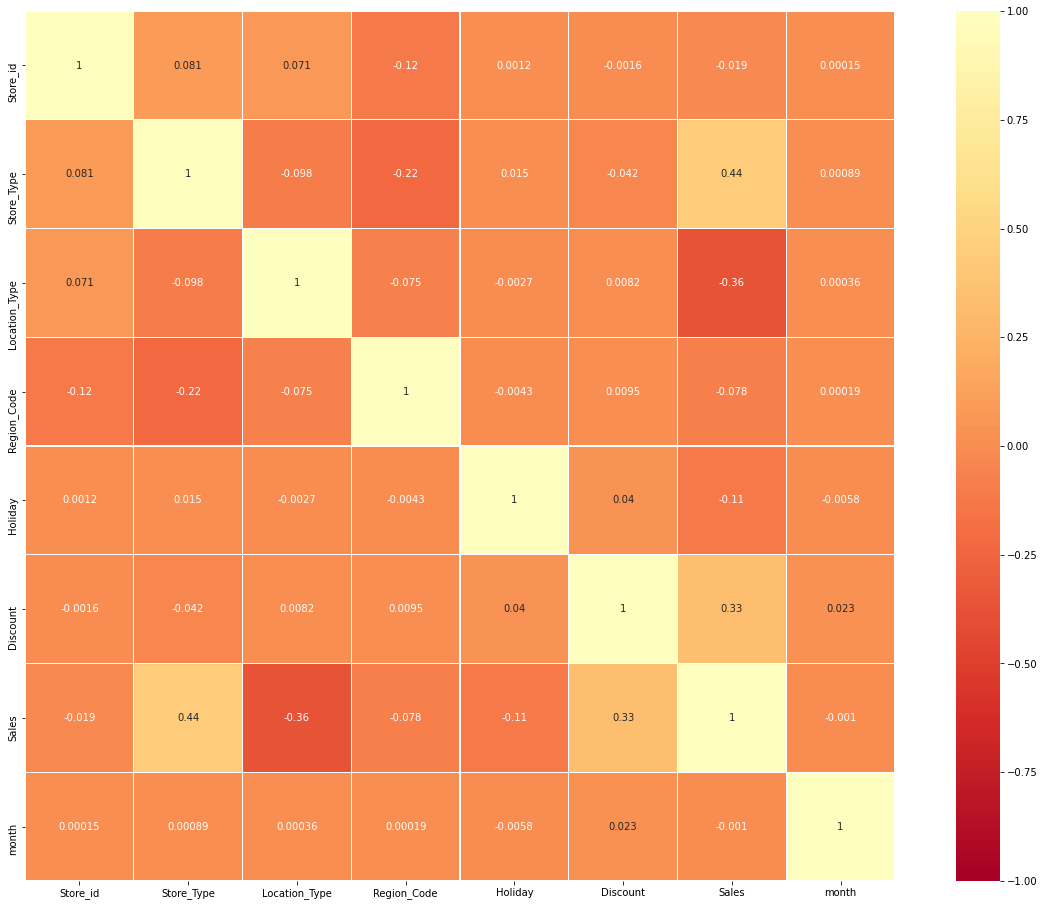

In [28]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='RdYlGn',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

In [29]:
corr2=test.corr()
corr2.shape

(7, 7)

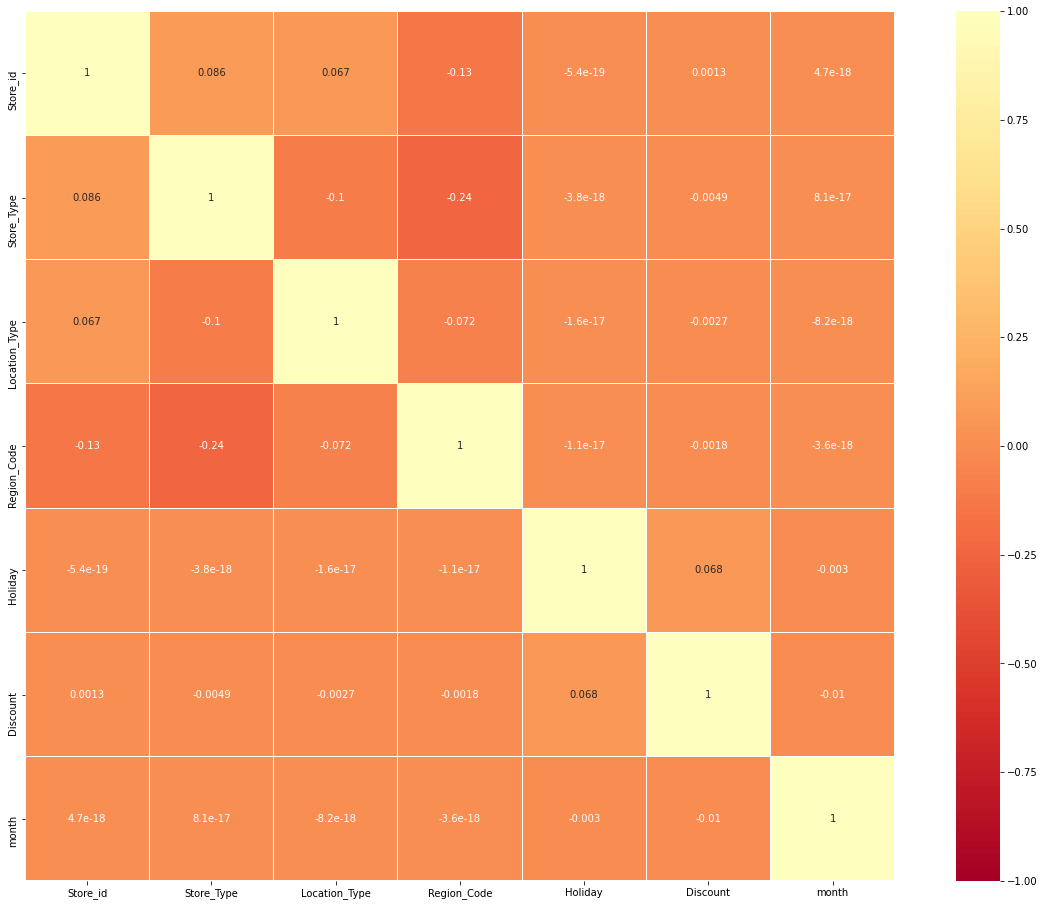

In [30]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr2,cbar=True,cmap='RdYlGn',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

In [31]:
#drop the label from feature
x=train.drop('Sales',axis=1)
y=train.Sales

#### Checking the importance of the features

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [33]:
print(model.feature_importances_)

[0.10003877 0.39975676 0.2086135  0.01795069 0.03388928 0.17453641
 0.06521458]


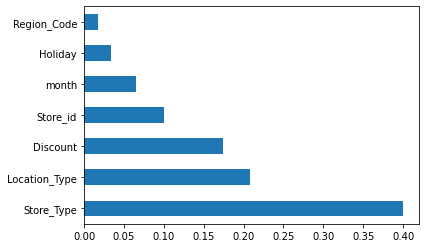

In [34]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

#### Standardization:

In [35]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#### Hold Out Method:

In [36]:
#building model to test unexposed data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

#### Model Building
We will check 3 models and the MSLE of them then we will save the best model.

#### Random Forest Regrssor:

In [37]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)

In [39]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rf_pred))

R Square Score of Random Forest Regressor: 0.7112682266728658


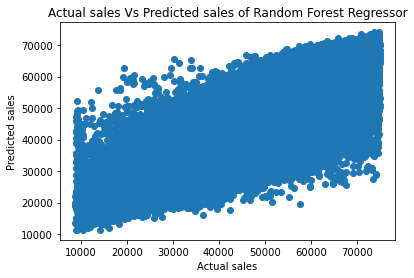

In [40]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted sales of Random Forest Regressor')
plt.show()

In [41]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)

#### Evaluation:

In [42]:
rf_accuracy = metrics.r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)

R Square Score of Random Forest Regressor: 0.6247581762425978
Accuracy of RFR : 62.475817624259776


In [43]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_log_error(y_test,y_test_rf_pred))

mean squared error of Gradient Boosting Regressor is:  0.050118935952754226


####  Gradient Boosting Regressor :

In [44]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [45]:
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)

In [46]:
print("R Square Score of Gradient Boosting Regressor: ",metrics.r2_score(y_train,y_gbr_pred))

R Square Score of Gradient Boosting Regressor:  0.608607328534988


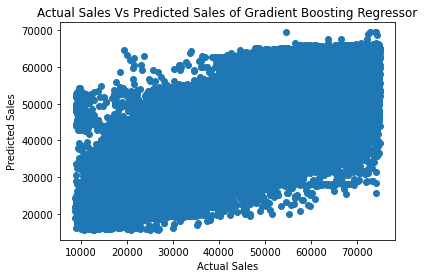

In [47]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales Vs Predicted Sales of Gradient Boosting Regressor')
plt.show()

In [48]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)

#### Evaluation:

In [49]:
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.6097608511306969
Accuracy of GBR : 60.976085113069686


In [50]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_log_error(y_test,y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  0.0517624873501812


#### Decision Tree Regressor:

In [51]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [52]:
#Model Prediction with trained data:
y_dt_pred = dt.predict(x_train)

In [53]:
print("R Square Score of Decision Tree Regressor: ",metrics.r2_score(y_train,y_dt_pred))

R Square Score of Decision Tree Regressor:  0.7130912144179564


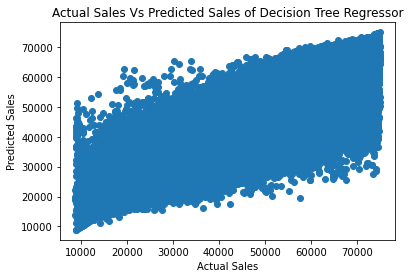

In [54]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_dt_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales Vs Predicted Sales of Decision Tree Regressor')
plt.show()

In [55]:
# Predicting test data with model:
y_test_dt_pred = dt.predict(x_test)

#### Evaluation:

In [56]:
dt_accuracy = metrics.r2_score(y_test,y_test_dt_pred)
print("R Square Score of Decision Tree Regressor:",dt_accuracy)
print('Accuracy of dt :',dt_accuracy*100)

R Square Score of Decision Tree Regressor: 0.6107053555173976
Accuracy of dt : 61.07053555173976


In [57]:
print ('mean squared log error of Decision Tree Regressor: ',mean_squared_log_error(y_test,y_test_dt_pred))

mean squared log error of Decision Tree Regressor:  0.05231552226905942


#### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [58]:
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('mean :',rf_cv_score.mean()*100)

[0.61645593 0.61097016 0.61320122 0.61227323 0.62147463]
mean : 61.487503084893355


In [59]:
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.61202555 0.61125835 0.60275889 0.60580567 0.60580776]
mean : 60.75312439978908


In [60]:
dt_cv_score = cross_val_score(dt,x_train,y_train,cv=5,scoring='r2')
print(dt_cv_score)
print('mean :',dt_cv_score.mean()*100)

[0.59596929 0.59164666 0.59189661 0.59361843 0.59506128]
mean : 59.36384526634848


#### Selection of the best model for Suppliment sales Prediction:
 Now let's check the difference between Accuracy Scores and Cross Validation Scores of the models to select the best model out of 3 models.
- RF : 62.47 - 61.48 = 0.99
- GBR : 60.97 - 60.75 = 0.22
- DT : 61.07 - 59.36 = 1.71
Hence, difference between CV score and accuracy score of GBR is least. And the Msle is also less. So we will predict with the GBR model.


In [61]:
# instantiating the test dataset into the X_test variable
X_test=test

In [62]:
# Doing the prediction using the test dataset
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(X_test)
score=gbr.score(x_train,y_train)
print(score,gbr,':')

0.6086073285349878 GradientBoostingRegressor() :


In [63]:
#model(test dataset) prediction using RFR
x_predict = list(gbr.predict(X_test))
df1_new = {'predicted_values':x_predict[0:22265],'orignal_values':y_test[0:22265]}
print(pd.DataFrame(df1_new))

        predicted_values  orignal_values
96889       41595.473963        26958.00
112908      40464.458024        38364.48
143567      41993.836164        50190.00
84278       40419.031800        71439.00
57090       40370.670027        39360.00
...                  ...             ...
22484       32448.740303        61725.00
174965      41993.836164        27207.00
164425      52073.193613        35013.00
96174       40419.031800        31887.00
50700       47811.149560        54690.00

[22265 rows x 2 columns]


In [65]:
submission = pd.read_csv("C:\\Users\HP\\Downloads\\SAMPLE(7).csv")
final_predictions =pd.DataFrame(gbr_pred)
datasets=pd.concat([submission['ID'],final_predictions],axis=1)
#only positive predictions for the target variable
datasets.columns=['ID','Sales']
datasets.to_csv("C:\\Users\HP\\Downloads\\SAMPLE(7).csv",index=False)